In [1]:
import  pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', 400)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Focus is always to understand the final data structure
* Support each step by visual analytics

In [5]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
pd_raw = pd.read_csv(url,sep=',')

In [3]:
pd_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197689,ZWE,Africa,Zimbabwe,2022-06-25,255309.0,0.0,79.429,5549.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197690,ZWE,Africa,Zimbabwe,2022-06-26,255355.0,46.0,79.143,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197691,ZWE,Africa,Zimbabwe,2022-06-27,255383.0,28.0,78.857,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197692,ZWE,Africa,Zimbabwe,2022-06-28,255383.0,0.0,66.286,5549.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
pd_raw.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [12]:
pd_raw.to_csv('covid_full_data.csv',';')

In [13]:
pd_raw.isnull().sum()

iso_code                                           0
continent                                      11464
location                                           0
date                                               0
total_cases                                     7925
new_cases                                       8144
new_cases_smoothed                              9318
total_deaths                                   26529
new_deaths                                     26547
new_deaths_smoothed                            27704
total_cases_per_million                         8799
new_cases_per_million                           9018
new_cases_smoothed_per_million                 10187
total_deaths_per_million                       27390
new_deaths_per_million                         27408
new_deaths_smoothed_per_million                28560
reproduction_rate                              49728
icu_patients                                  171519
icu_patients_per_million                      

In [15]:
pd_raw['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [36]:
df_India=pd_raw[pd_raw['location']=='India']

In [37]:
df_India.reset_index(drop=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
1,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
3,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
4,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,IND,Asia,India,2022-06-25,43389973.0,11739.0,13325.857,524999.0,25.0,20.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
878,IND,Asia,India,2022-06-26,43407046.0,17073.0,13939.000,525020.0,21.0,21.000,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
879,IND,Asia,India,2022-06-27,43418839.0,11793.0,14206.143,525047.0,27.0,22.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
880,IND,Asia,India,2022-06-28,43433345.0,14506.0,14528.571,525077.0,30.0,24.857,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [38]:
import missingno as msno

In [39]:
df_India.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:>

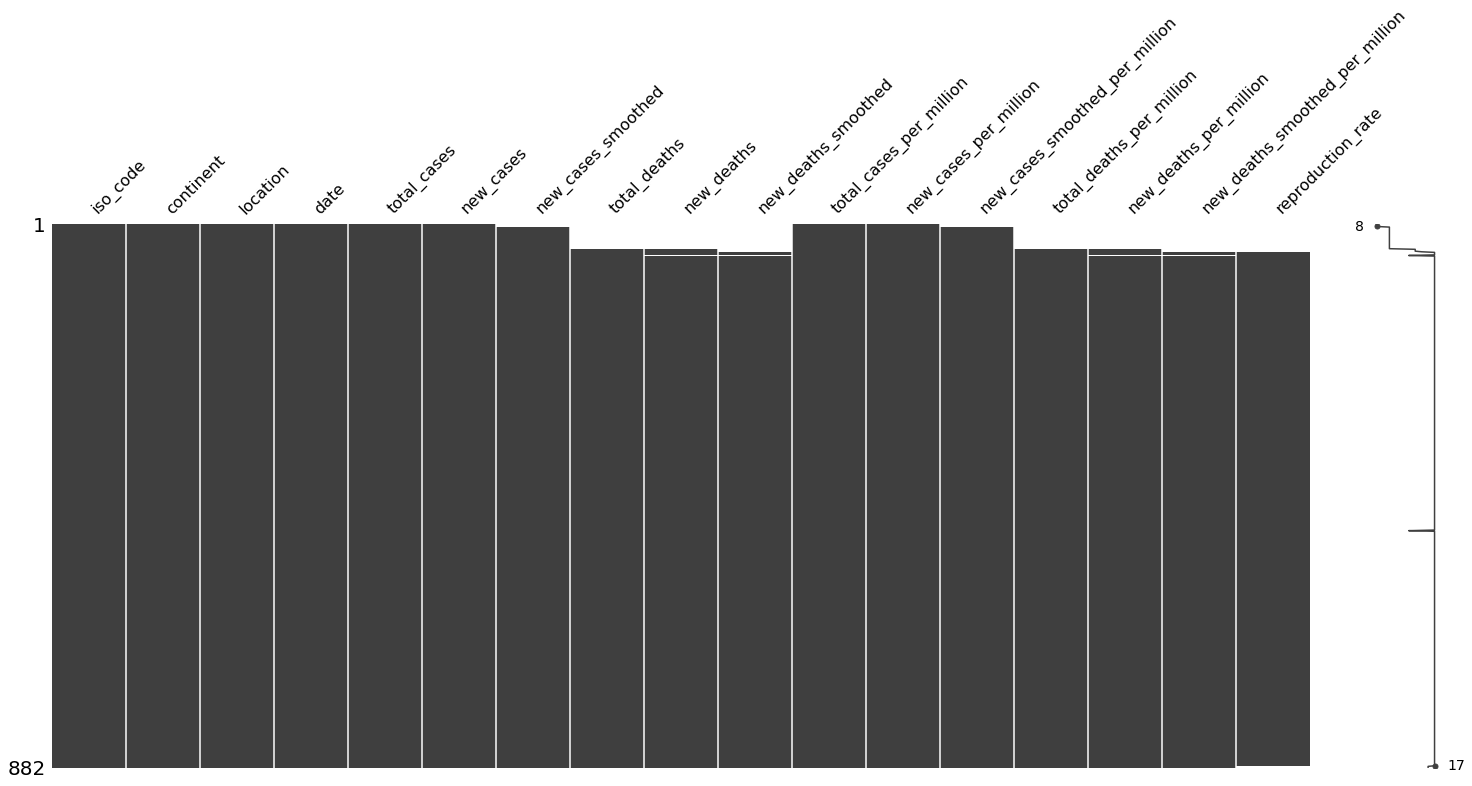

In [40]:
msno.matrix(df_India[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate']])

In [41]:
df_India.head(9)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
81641,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81642,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81643,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81644,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81645,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81646,IND,Asia,India,2020-02-04,3.0,0.0,0.429,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81647,IND,Asia,India,2020-02-05,3.0,0.0,0.429,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81648,IND,Asia,India,2020-02-06,3.0,0.0,0.286,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
81649,IND,Asia,India,2020-02-07,3.0,0.0,0.286,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [42]:
import plotly.express as px
fig = px.line(df_India, x="date", y= "total_cases", title= 'Covid Cases')
fig.show()

In [48]:
b_India=pd_raw['location']=='India'
b_Germany=pd_raw['location']=='Germany'
b_France=pd_raw['location']=='France'

In [49]:
b_all=b_India|b_Germany|b_France

In [50]:
df_my_list = pd_raw[b_all]

In [51]:
df_my_list

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
62418,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
62419,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
62420,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,-3599.6,-6.61,-7.74,-53.389101
62421,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
62422,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82518,IND,Asia,India,2022-06-25,43389973.0,11739.0,13325.857,524999.0,25.0,20.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
82519,IND,Asia,India,2022-06-26,43407046.0,17073.0,13939.000,525020.0,21.0,21.000,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
82520,IND,Asia,India,2022-06-27,43418839.0,11793.0,14206.143,525047.0,27.0,22.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
82521,IND,Asia,India,2022-06-28,43433345.0,14506.0,14528.571,525077.0,30.0,24.857,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [52]:
fig = px.line(df_my_list, x="date", y= "total_cases",color="location", title= "Covid Cases")
fig.show()

# Task 1
*  The Relative Cases overtime of Covid infectors (total_cases/population) for 3 countries

In [61]:
df_my_list['total_cases_per_population']=df_my_list['total_cases']/df_my_list['population']
fig = px.line(df_my_list, x="date", y= "total_cases_per_population",color="location", title= " The Relative Cases overtime of Covid infectors (total_cases/population) ")
#fig = px.line(df_my_list, x="date", y= "total_cases",color="location", title= "Covid Cases")
fig.update_xaxes(range=["2020-03-20","2022-06-22"])
fig.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_20172/1129658823.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Task 2

* Vaccination Rate(people_fully_vaccinated/population) for 3 Countries

In [67]:
df_my_list['vaccinated_rate'] = df_my_list['people_fully_vaccinated']/df_my_list['population']
fig = px.line(df_my_list, x="date", y= "vaccinated_rate",color="location", title= "Vaccination Rate(people_fully_vaccinated/population) over time")
fig.update_xaxes(range=["2021-03-20","2022-06-22"])
fig.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_20172/865594784.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

